In [151]:
import pandas as pd #Se importan las librerias y funciones necesarias 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#Esta es una funcion que yo cree para ver cual es el porcentaje de valores nulo en la data 
def missing_data(df):
    total_null = df.isna().sum().sort_values(ascending=False)
    percent = (df.isna().sum()/df.isna().count()).sort_values(ascending=False)
    missing_data_table = pd.concat([total_null, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data_table)
    return 

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

In [152]:
dataset = pd.read_csv('googleplaystore.csv')
dataset.head(10)# Verificar que los datos se hayan cargod bien 
#dataset.columns

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [153]:
columnas = ['Category','Rating','Reviews','Installs','Genres']
df = dataset[columnas]
df.head(10)

,Category,Rating,Reviews,Installs,Genres
0,ART_AND_DESIGN,4.1,159,"10,000+",Art & Design
1,ART_AND_DESIGN,3.9,967,"500,000+",Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,"5,000,000+",Art & Design
3,ART_AND_DESIGN,4.5,215644,"50,000,000+",Art & Design
4,ART_AND_DESIGN,4.3,967,"100,000+",Art & Design;Creativity
5,ART_AND_DESIGN,4.4,167,"50,000+",Art & Design
6,ART_AND_DESIGN,3.8,178,"50,000+",Art & Design
7,ART_AND_DESIGN,4.1,36815,"1,000,000+",Art & Design
8,ART_AND_DESIGN,4.4,13791,"1,000,000+",Art & Design
9,ART_AND_DESIGN,4.7,121,"10,000+",Art & Design;Creativity


In [154]:
#Revisamos primero con que tipo de datos trabajaremos
df.dtypes

Category     object
Rating      float64
Reviews      object
Installs     object
Genres       object
dtype: object

In [155]:
#Transformar la varible Reviews a formato numerico 
label_encoder = LabelEncoder()
df['Reviews'] = label_encoder.fit_transform(df['Reviews'])

#Transformar la variable Installs a formato numerico 
df['Installs'] = pd.to_numeric(df['Installs'].str.replace(',', '').str.rstrip('+'), errors='coerce')


#verificar si no hay valores nulo en el dataset
missing_data(df) #Cuantos valores NaN hay en nuestro nuevo data set, y el porcentaje en relacion 
#a la cantidad de datos que tenemos 

          Total   Percent
Rating     1474  0.135965
Installs      1  0.000092
Genres        0  0.000000
Reviews       0  0.000000
Category      0  0.000000


C:\Users\toni7\AppData\Local\Temp\ipykernel_3196\2084598066.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Reviews'] = label_encoder.fit_transform(df['Reviews'])
C:\Users\toni7\AppData\Local\Temp\ipykernel_3196\2084598066.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs'] = pd.to_numeric(df['Installs'].str.replace(',', '').str.rstrip('+'), errors='coerce')


In [156]:
#Resvisar ese valor atipico 
df_no_installs = df[df['Installs'].isnull()]
print(df_no_installs)

      Category  Rating  Reviews  Installs             Genres
10472      1.9    19.0     2855       NaN  February 11, 2018


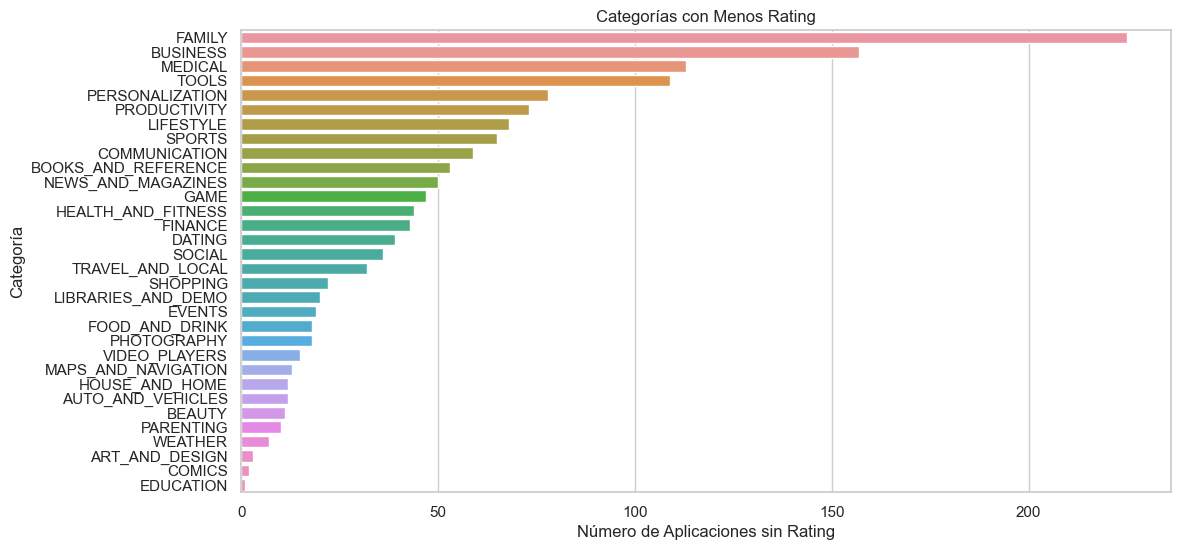

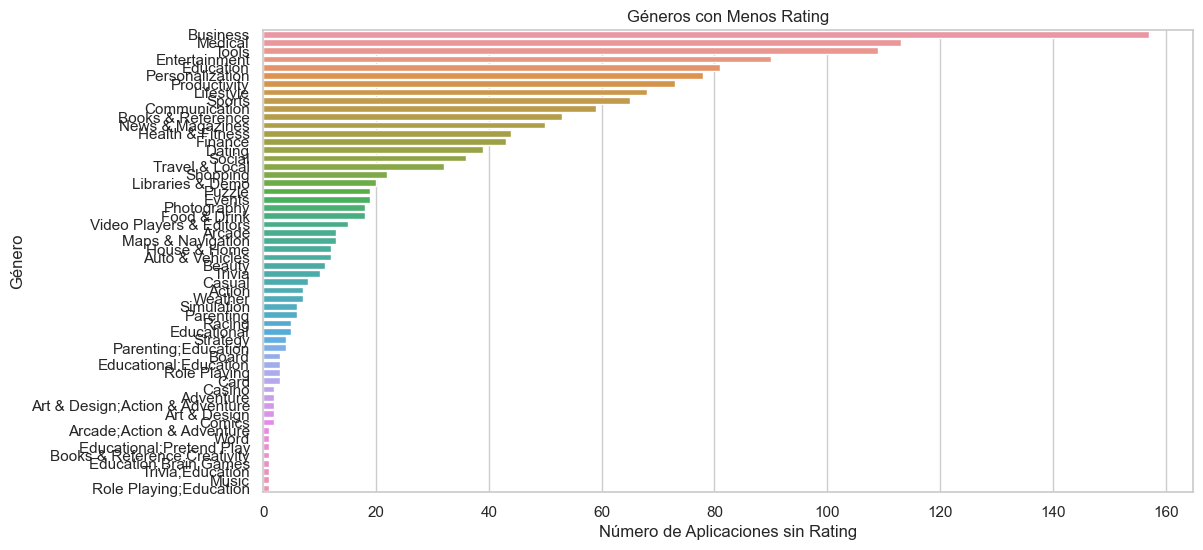

In [157]:
#Graficas de apps que no tienen rating
df_no_rating = df[df['Rating'].isnull()]

# Gráfico de barras para las categorías con menos rating
plt.figure(figsize=(12, 6))
sns.countplot(y='Category', data=df_no_rating, order=df_no_rating['Category'].value_counts().index)
plt.title('Categorías con Menos Rating')
plt.xlabel('Número de Aplicaciones sin Rating')
plt.ylabel('Categoría')
plt.show()

# Gráfico de barras para los géneros con menos rating
plt.figure(figsize=(12, 6))
sns.countplot(y='Genres', data=df_no_rating, order=df_no_rating['Genres'].value_counts().index)
plt.title('Géneros con Menos Rating')
plt.xlabel('Número de Aplicaciones sin Rating')
plt.ylabel('Género')
plt.show()

In [158]:
#Para realizar un analisis exploratorio para este ejercicio quitaremos los valores nulo 
df2=df.dropna()
df2=df.dropna(axis=0) 
#missing_data(df2)

# Análisis descriptivo de las variables numéricas
print(df2.describe())


            Rating      Reviews      Installs
count  9366.000000  9366.000000  9.366000e+03
mean      4.191757  2966.133995  1.789744e+07
std       0.515219  1742.412114  9.123822e+07
min       1.000000     1.000000  1.000000e+00
25%       4.000000  1483.000000  1.000000e+04
50%       4.300000  2936.000000  5.000000e+05
75%       4.500000  4474.750000  5.000000e+06
max       5.000000  6001.000000  1.000000e+09


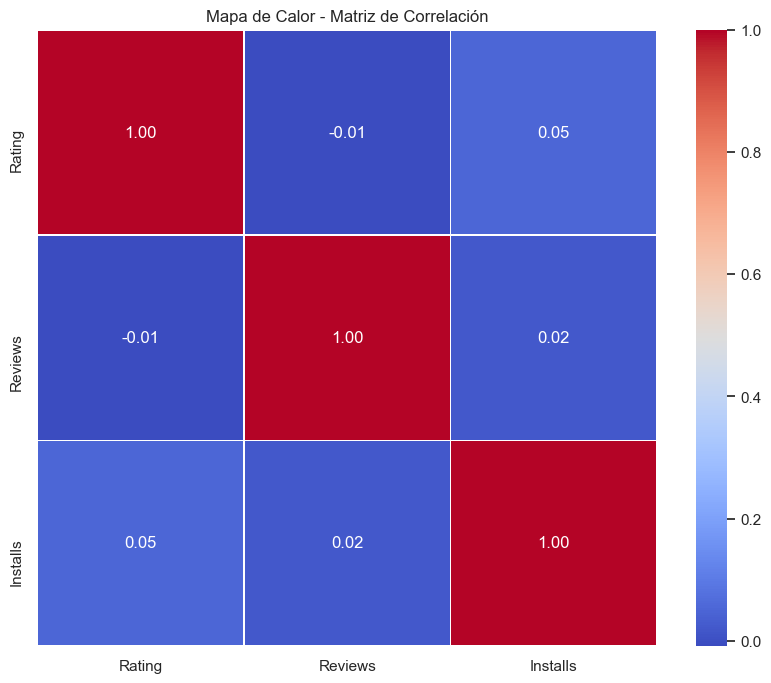

In [159]:
#Matriz de correlacion a ver si hay alguna informacion util 
correlation_matrix = df2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor - Matriz de Correlación')
plt.show()


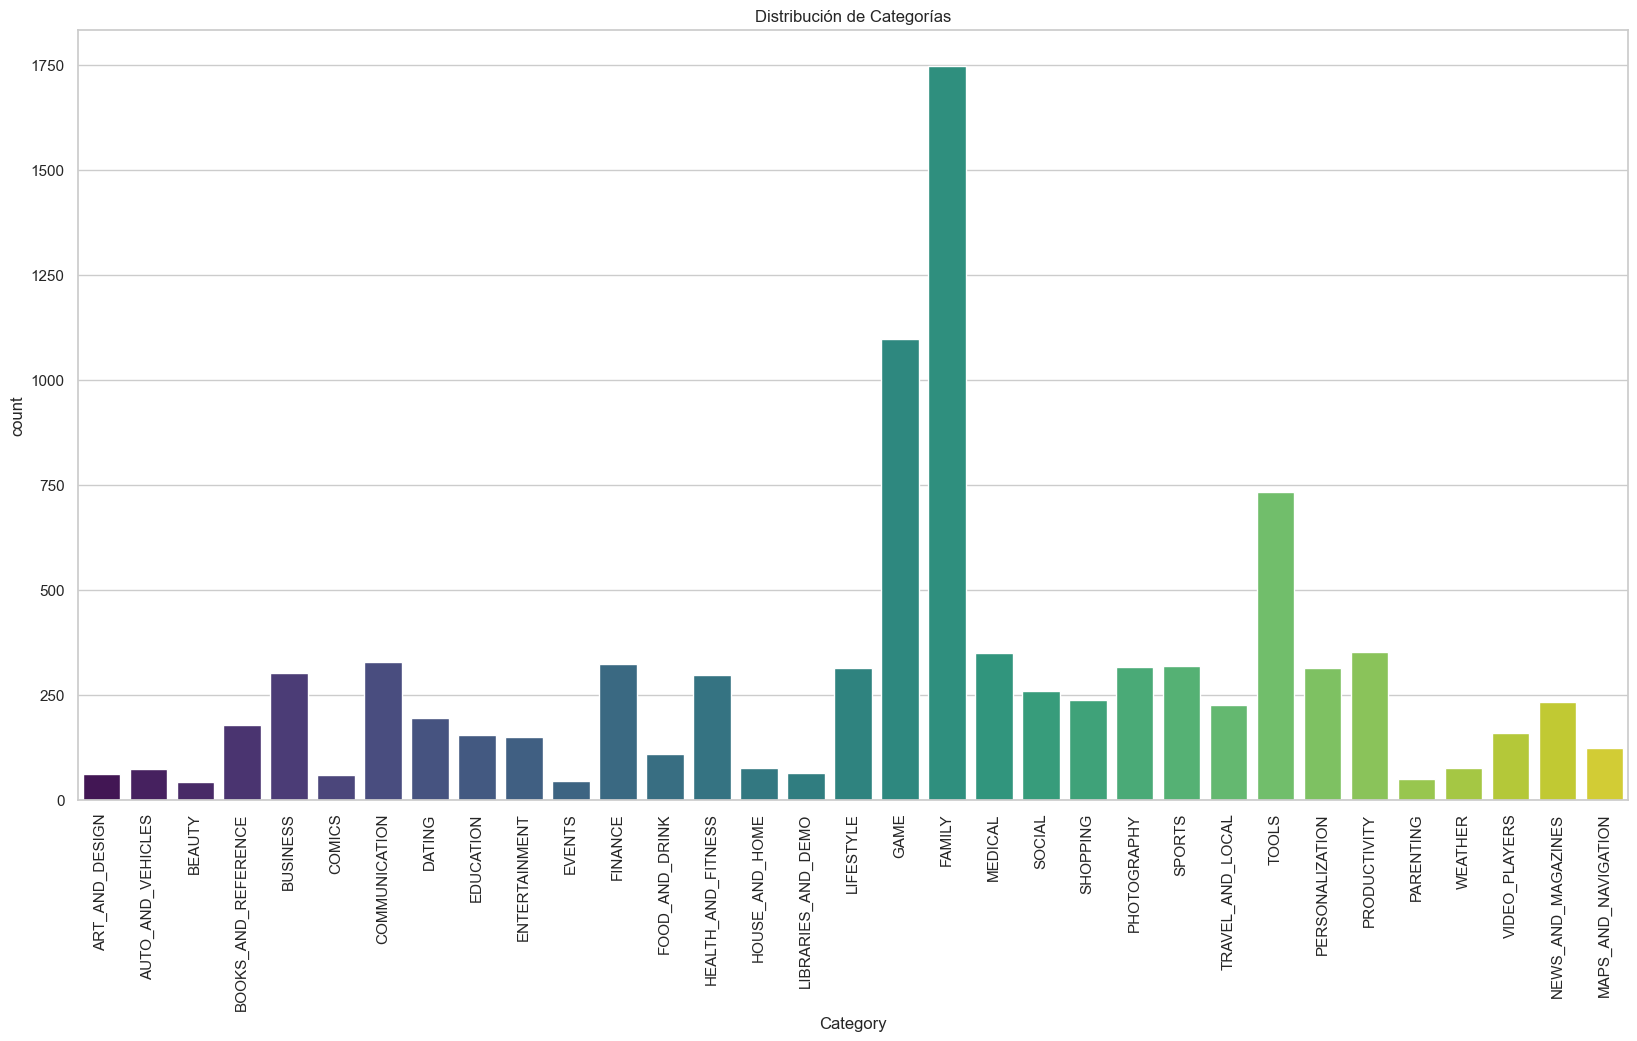

In [160]:
# Configuración de estilo de seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(20,10))
sns.countplot(x='Category', data=df2, palette='viridis')
plt.title('Distribución de Categorías')
plt.xticks(rotation=90) 
plt.show()


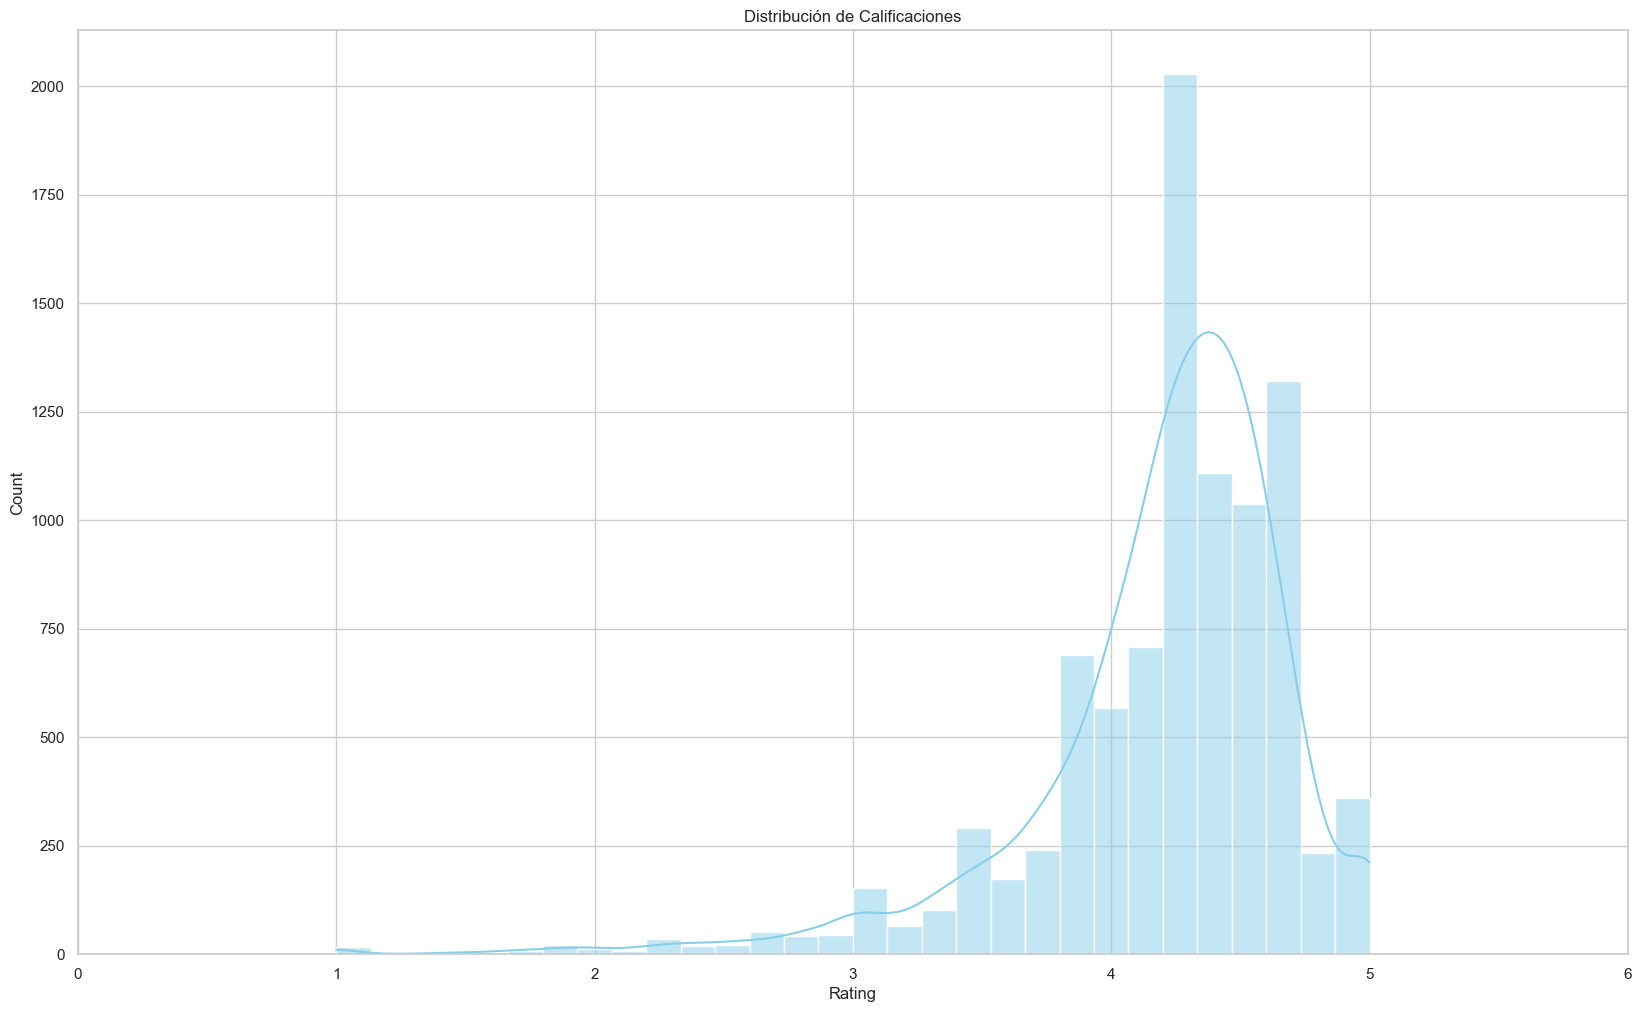

In [161]:
# Gráfico de distribución de las calificaciones (Rating)
sns.set(style="whitegrid")
plt.figure(figsize=(20, 12))
sns.histplot(df2['Rating'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Calificaciones')
plt.xlim(0,6)
plt.show()

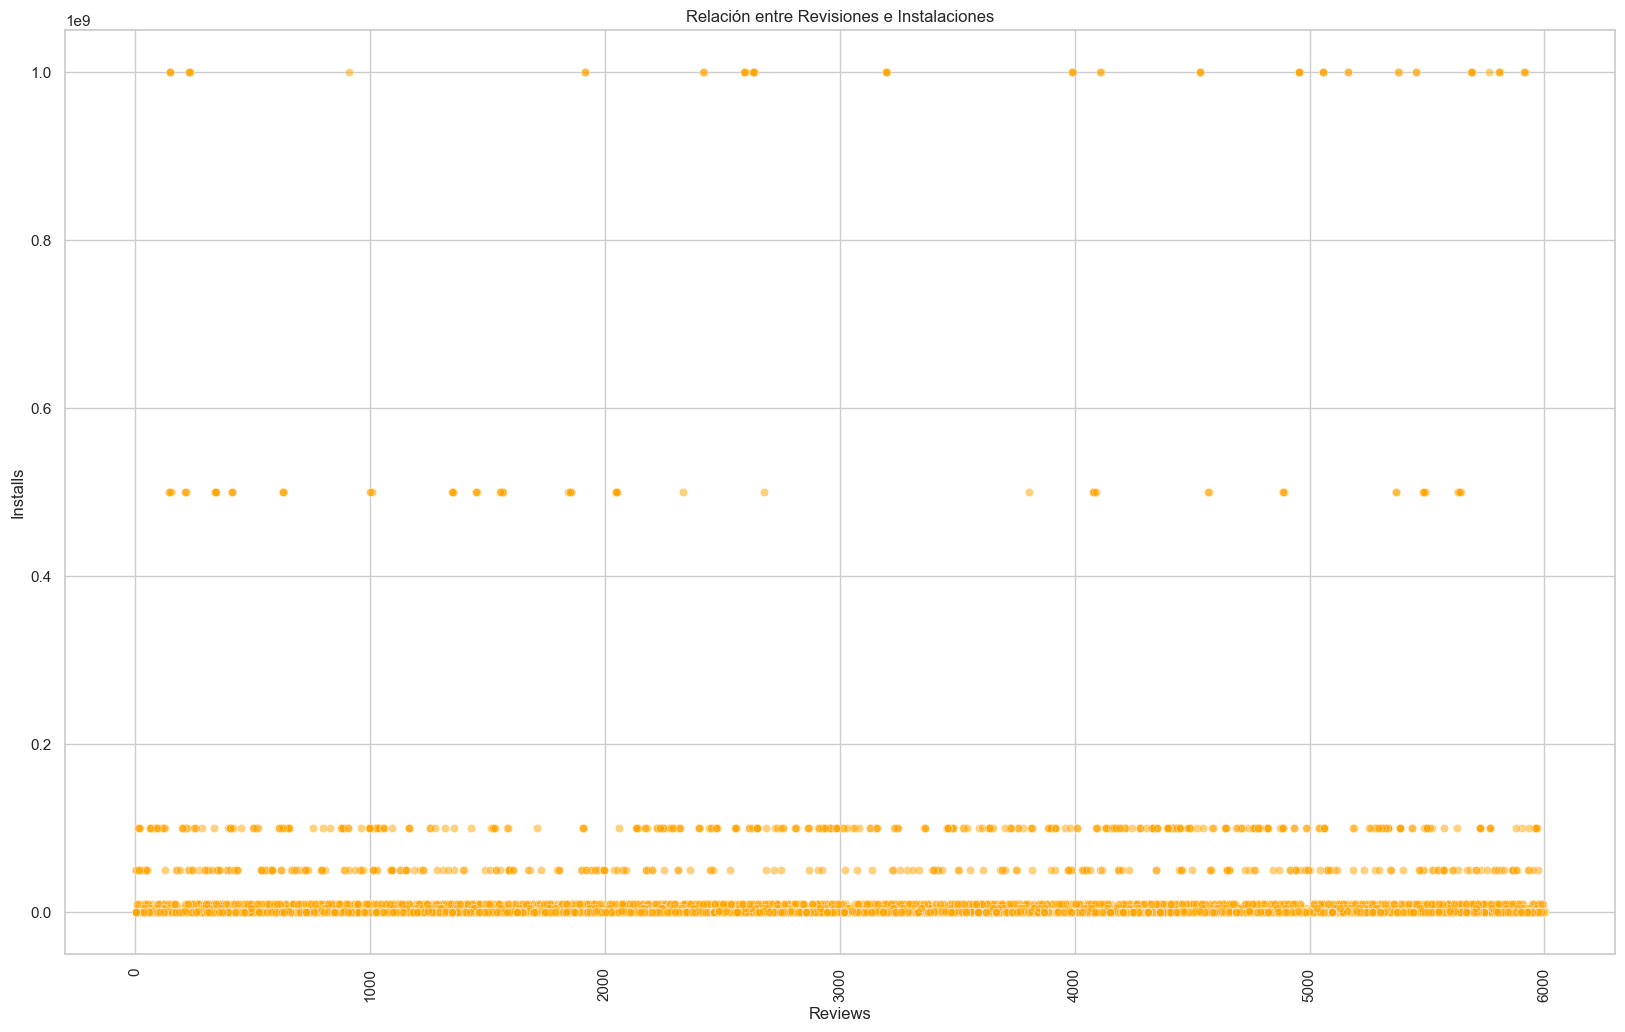

In [162]:
# # Gráfico de dispersión entre revisiones e instalaciones
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Reviews', y='Installs', data=df2, alpha=0.5, color='orange')
plt.title('Relación entre Revisiones e Instalaciones')
plt.xticks(rotation=90)  # Rotar nombres del eje x
plt.show()

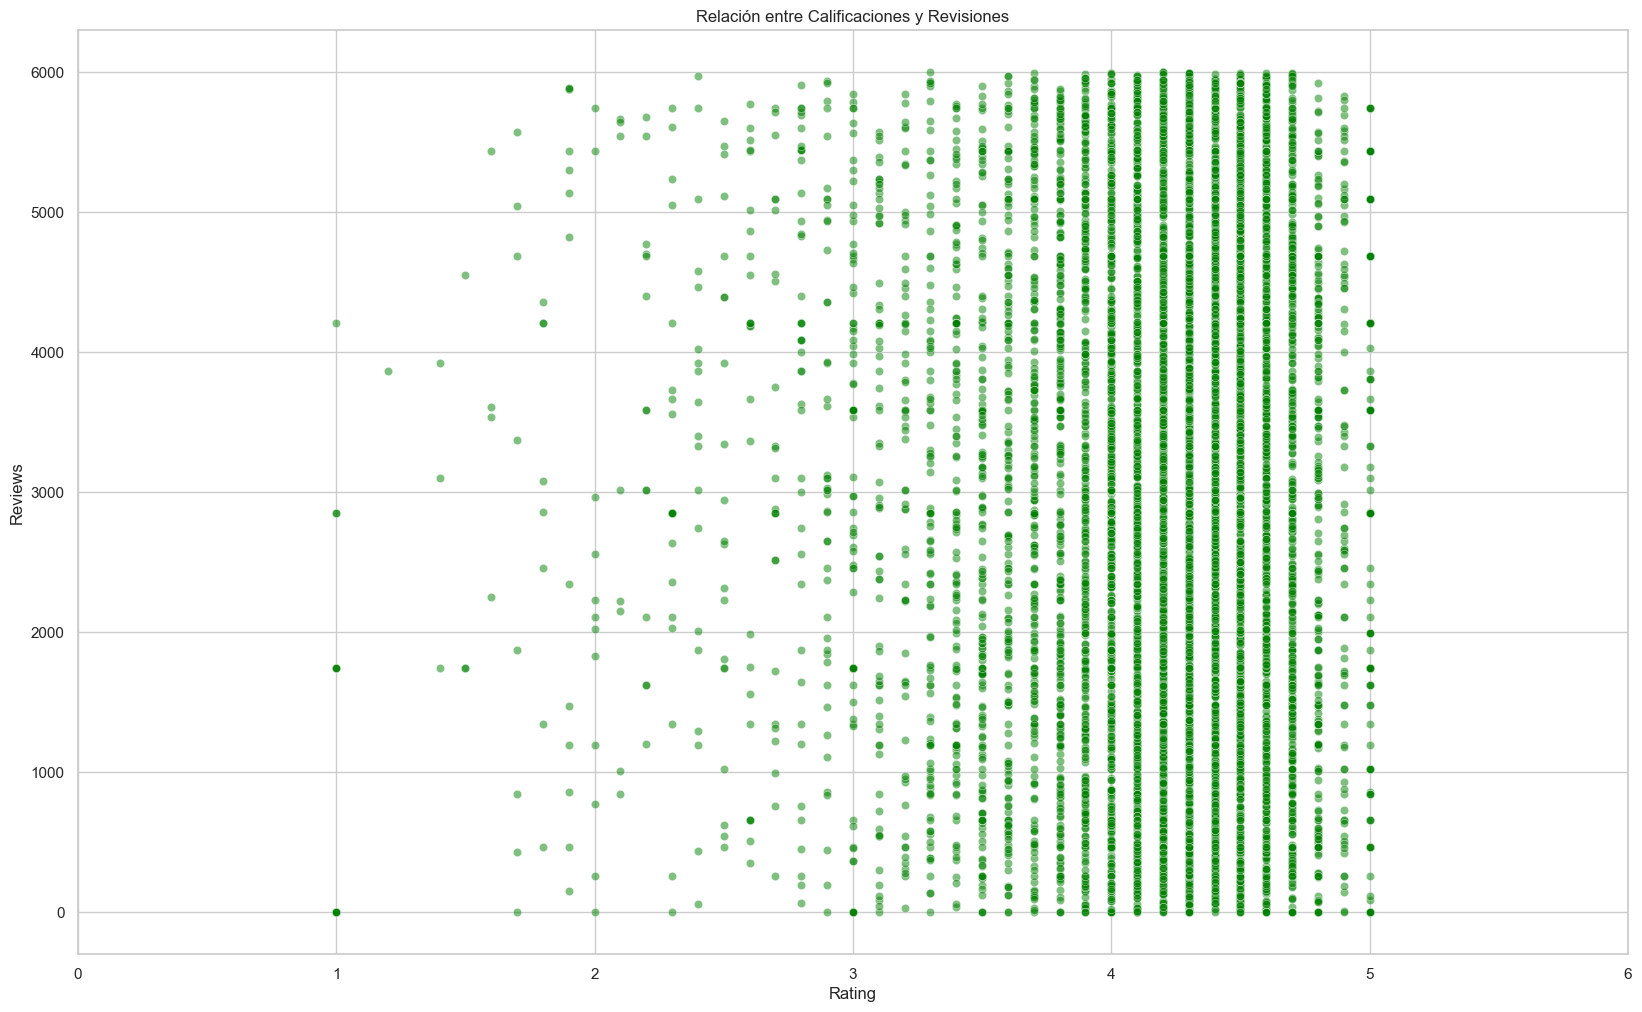

In [163]:
# Gráfico de dispersión entre Calificaciones y Revisiones
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Rating', y='Reviews', data=df2, alpha=0.5, color='green')
plt.title('Relación entre Calificaciones y Revisiones')
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.xlim(0,6)
plt.show()

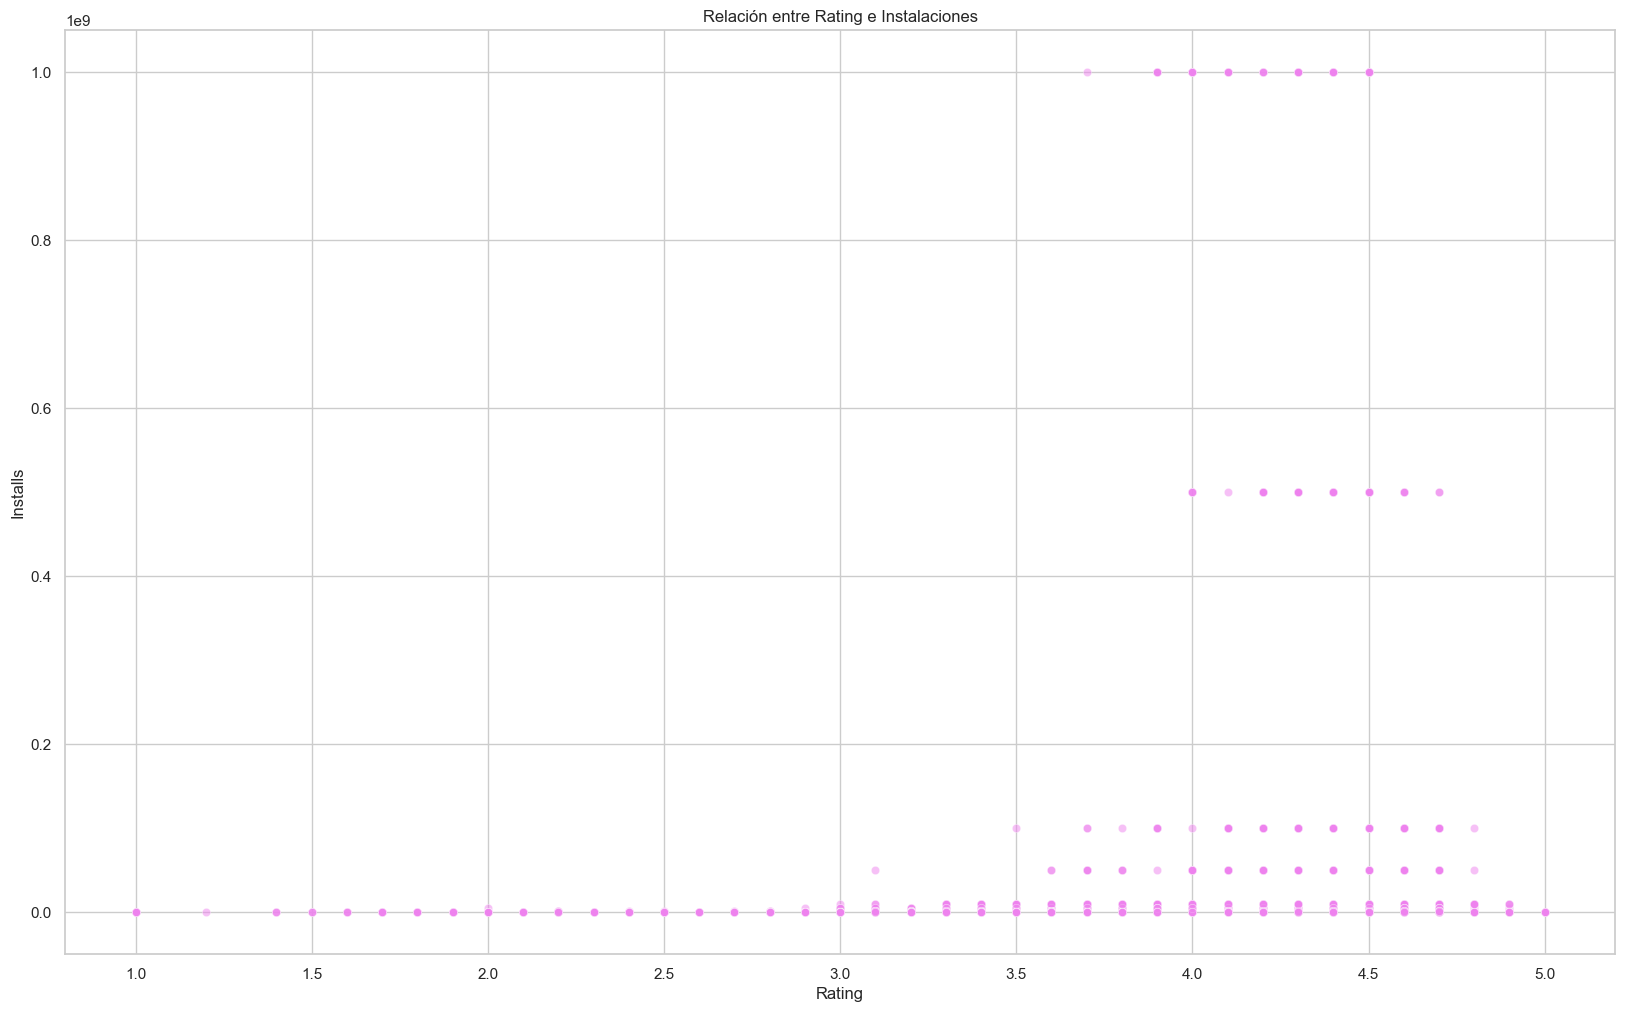

In [164]:
# # Gráfico de dispersión entre revisiones e instalaciones
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Rating', y='Installs', data=df2, alpha=0.5, color='violet')
plt.title('Relación entre Rating e Instalaciones')
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.show()

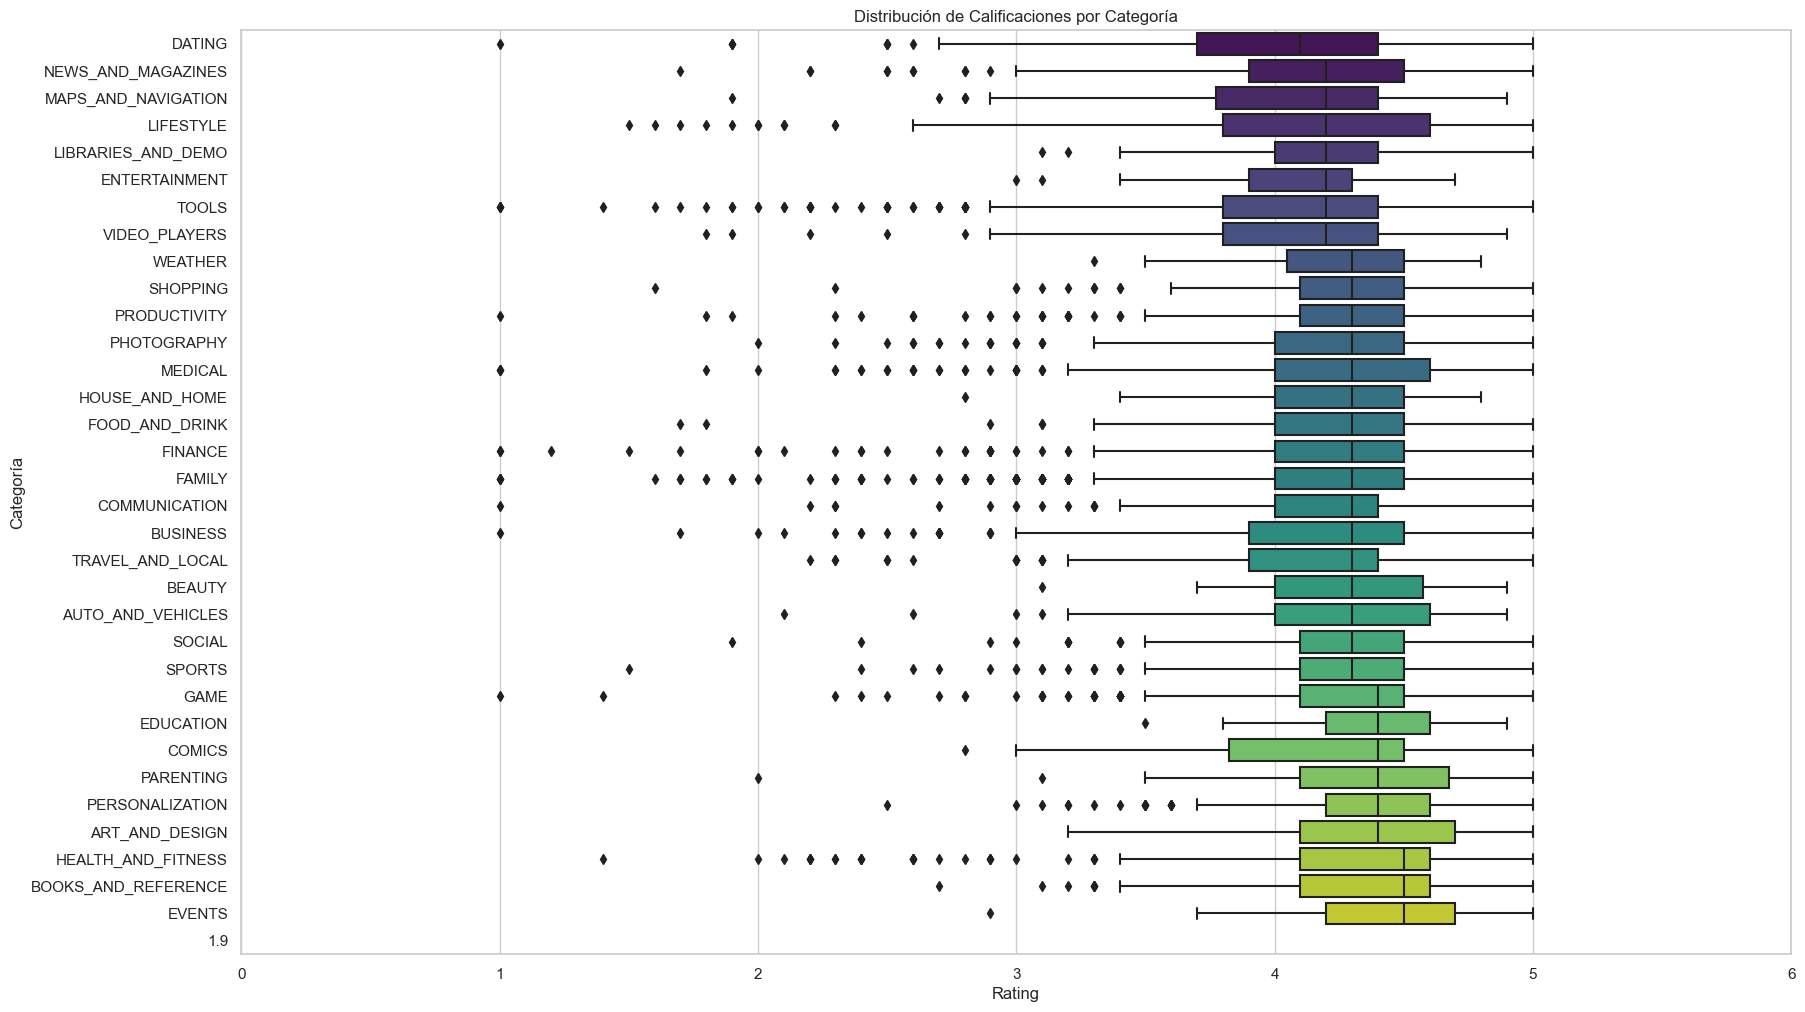

In [165]:
# Boxplot de Calificaciones por Categoría
plt.figure(figsize=(20, 12))
sns.boxplot(x='Rating', y='Category', data=df2, order=df.groupby('Category')['Rating'].median().sort_values().index, palette='viridis')
plt.title('Distribución de Calificaciones por Categoría')
plt.xlabel('Rating')
plt.ylabel('Categoría')
plt.xlim(0,6)
plt.show()

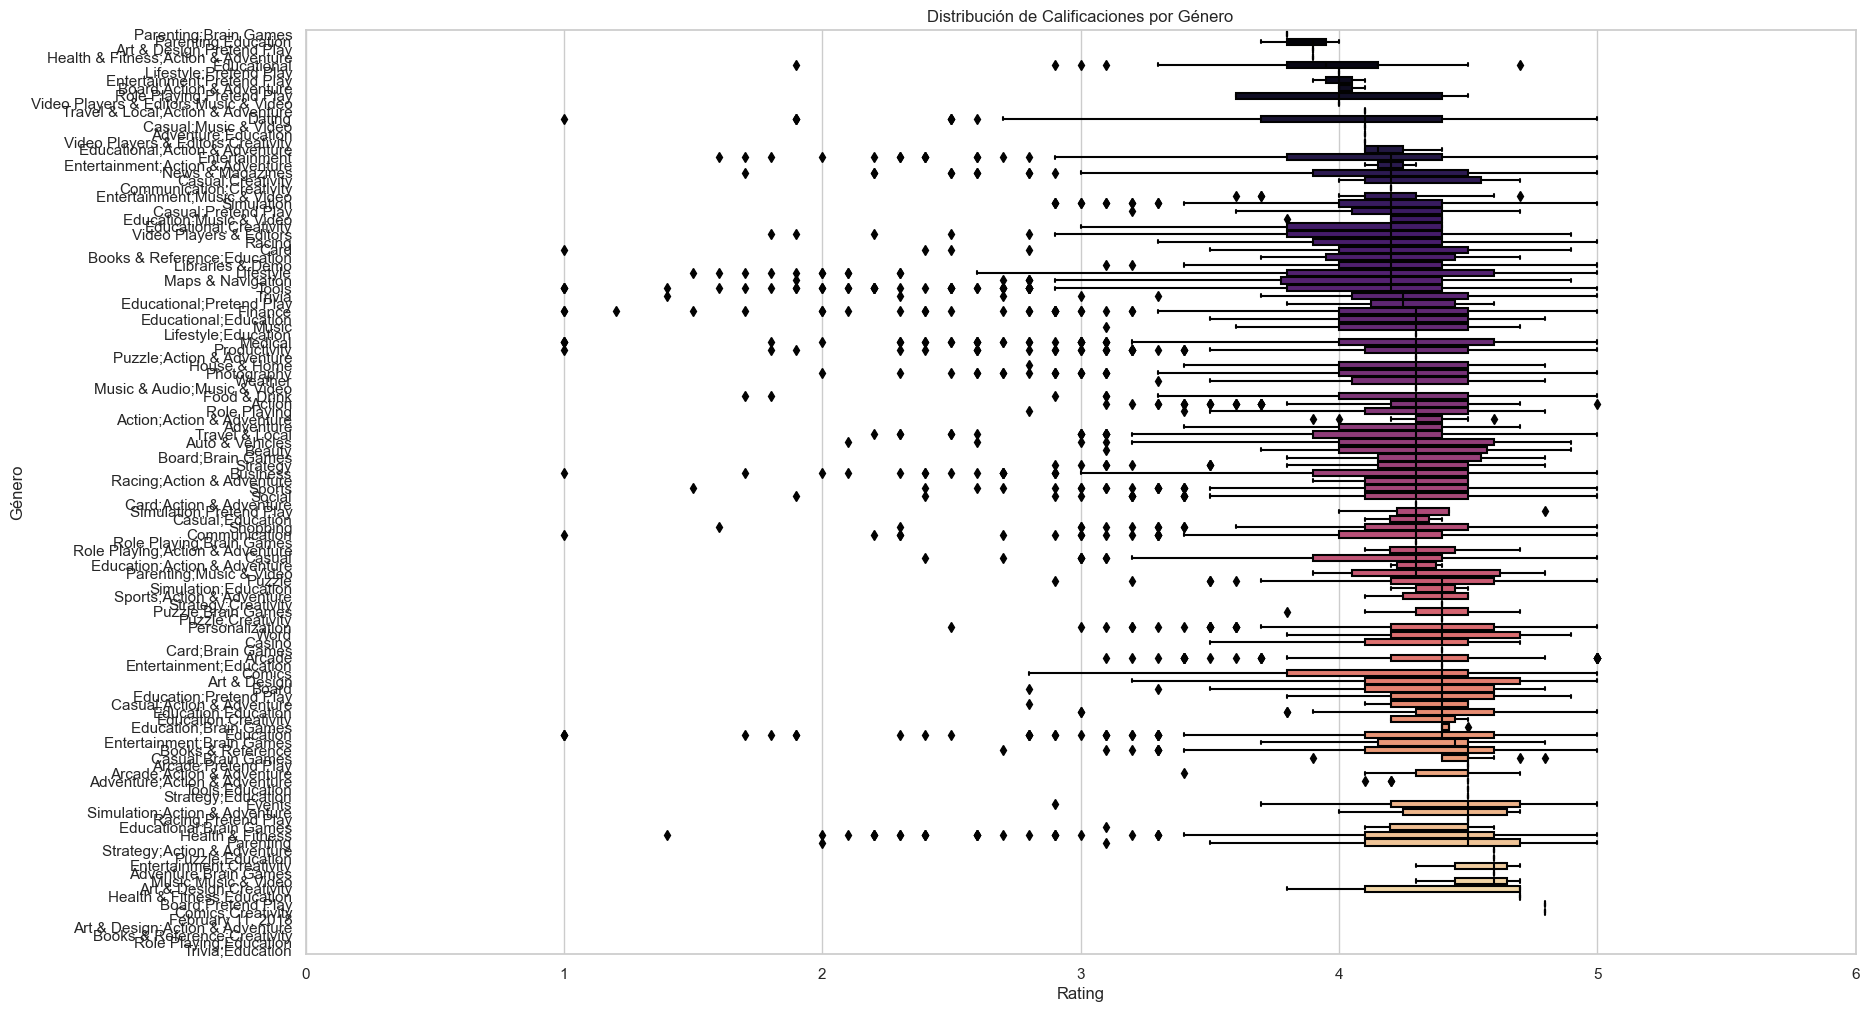

In [166]:

# Boxplot de Calificaciones por Género
plt.figure(figsize=(20, 12))
sns.boxplot(x='Rating', y='Genres', data=df2, order=df.groupby('Genres')['Rating'].median().sort_values().index, palette='magma')
plt.title('Distribución de Calificaciones por Género')
plt.xlabel('Rating')
plt.ylabel('Género')
plt.xlim(0,6)
plt.show()

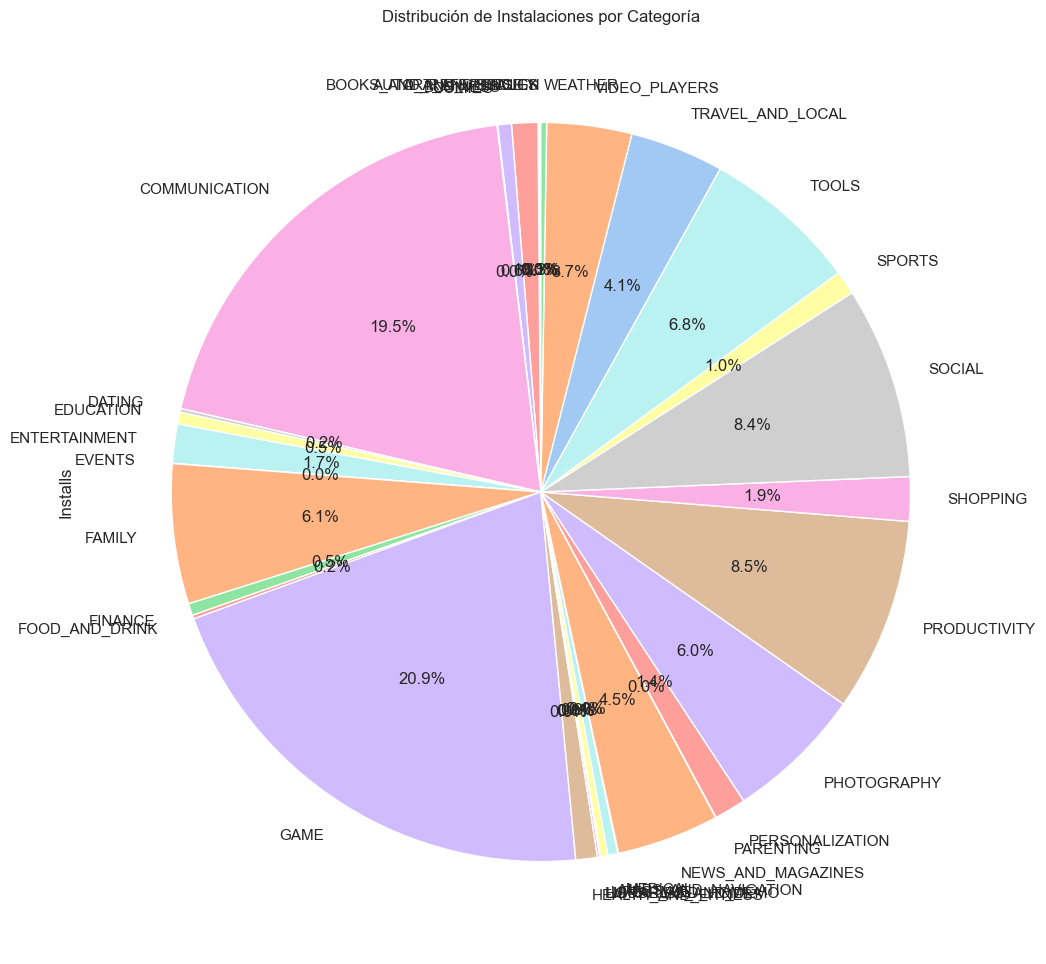

In [167]:
#  Gráfico de pastel para la distribución de instalaciones
plt.figure(figsize=(20, 12))
df2.groupby('Category')['Installs'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Distribución de Instalaciones por Categoría')
plt.show()